In [58]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import PassiveAggressiveClassifier
import matplotlib.pyplot as plt

In [43]:
df=pd.read_csv('news.csv')

In [44]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [45]:
label=df.label
label.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [46]:
#Splliting the data sets
x_train,x_test,y_train,y_test=train_test_split(df['text'],label, test_size=0.2, random_state=7)

In [47]:
vectoize=TfidfVectorizer(stop_words='english',max_df=7)

In [48]:
tfidf_train=vectoize.fit_transform(x_train)
tfidf_test=vectoize.transform(x_test)

In [49]:
vectoize.get_feature_names_out()

array(['0000', '000000031', '00000031', ..., 'هذا', 'والمرضى', 'ยงade'],
      dtype=object)

In [50]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

# Predict test and accuracy

In [51]:
y_predict=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_predict)

In [52]:
score

0.7719021310181531

# Confusin Matrics

In [55]:
cm=confusion_matrix(y_test,y_predict,labels=['FAKE','REAL'])
cm

array([[521, 117],
       [172, 457]], dtype=int64)

# In this data 521=true positive, 117=false positive, 172=false negative, 457=true negative

<Axes: >

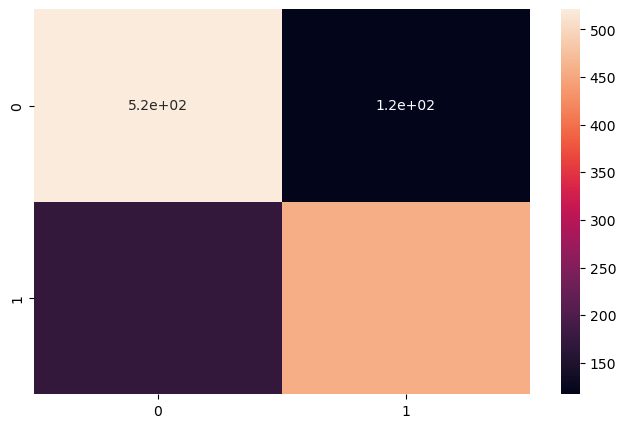

In [60]:
import seaborn as sn
plt.figure(figsize=(8,5))
sn.heatmap(cm,annot=True)